### Upload the Telco Customer Churn dataset from your local machine


In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


### Step 1: Import Required Libraries


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve



### Load the Telco Customer Churn dataset


In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 3: Inspect Dataset and Handle Data Types


In [4]:
df.info()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 4: Drop Missing Values and Unnecessary Columns


In [5]:
df = df.dropna()
df = df.drop('customerID', axis=1)


### Step 5: Encode Binary Columns and Gender


In [6]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})


### Step 6: One-Hot Encode Categorical Variables


In [7]:
df = pd.get_dummies(df, drop_first=True)


### Step 7: Split Dataset into Training and Testing Sets


In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We then used train_test_split from sklearn.model_selection to divide the data into training and testing sets using an 80/20 split. This allows us to train our model on one portion of the data and evaluate it on unseen data for better generalization.

In [10]:
# Step X: Normalize features for logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step 8: Train Logistic Regression Model


In [11]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

We initialized a logistic regression model using LogisticRegression(max_iter=1000) from sklearn.linear_model. Then we fit the model on the training data (X_train, y_train). This step allows the model to learn the relationship between the input features and the target variabl



### Step 9: Save and Reload the Model

To preserve our trained logistic regression model for future use or deployment, we use the `joblib` library to serialize (save) the model to a `.pkl` file. We then demonstrate how to reload the saved model and generate predictions on the test data. This ensures reproducibility and allows us to make predictions without retraining the model each time.


In [12]:
# Save model to a file
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

After training the logistic regression model, we saved it using joblib.dump() so it can be reused without retraining. This is especially helpful for deploying the model or using it later in a separate pipeline or application.

### Step 10: Load and Use the Saved Model

In [13]:
# Load the model from the file
loaded_model = joblib.load('logistic_regression_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# (Optional) Check predictions
print(y_pred[:10])


[0 0 1 0 0 0 0 1 0 0]


Predictions are generated using the `predict()` method on `X_test`.
- The first 10 predictions are printed as a quick check to ensure the model is functioning correctly.


### Step 11: Model Evaluation – Accuracy, Precision, Recall, and Confusion Matrix

In [18]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[915 118]
 [181 193]]


After training and saving the logistic regression model, we evaluated its performance on the test dataset.

- **Accuracy**: **78.75%**  
  The model correctly predicted the target label for 78.75% of the test data.

- **Classification Report**:
  - **Class 0** (majority class):  
    - Precision: 0.83  
    - Recall: 0.89  
    - F1-Score: 0.86
  - **Class 1** (minority class):  
    - Precision: 0.62  
    - Recall: 0.52  
    - F1-Score: 0.56
  - **Macro Avg**: F1-score of 0.71 (equal weight to both classes)  
  - **Weighted Avg**: F1-score of 0.78 (accounts for class imbalance)

- **Confusion Matrix**:
[[915 118]
[181 193]]

### Step 12: Plot ROC Curve


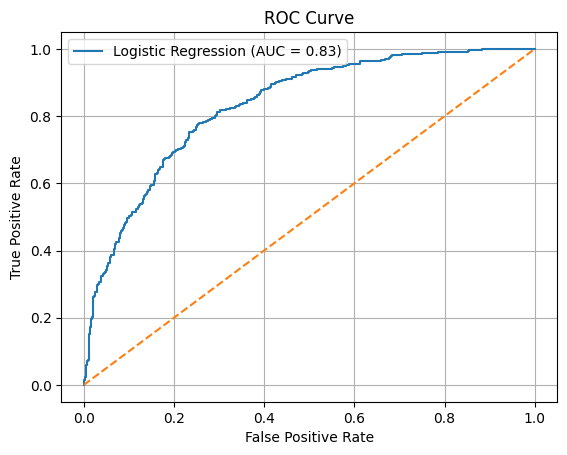

In [19]:
y_probs = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


The ROC (Receiver Operating Characteristic) curve illustrates the model's ability to distinguish between the two classes across different classification thresholds. A model with an AUC (Area Under the Curve) closer to 1 indicates better performance.

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate.

The AUC score for our model is 0.84, indicating strong classification performance.

The diagonal line represents a model with no discriminative power (AUC = 0.5).